<a href="https://colab.research.google.com/github/ankita1964/Flipkary_Product_Category_Prediction/blob/main/MIDAS_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Exploratory Data Analysis**

1.0 Reading the data from the csv file and importing some necessary packages.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df = pd.read_csv('./drive/My Drive/flipkart_product_category.csv', encoding = 'latin-1')

1.1 Understanding the dataset overall in terms of the size and data columns while trying to figure out how categories are mentioned. 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [ ]:
df.tail(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19990,5847c8e9547dd50843f9d89886848ab9,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KNKXY33QZJ,1299.0,999.0,"[""http://img6a.flixcart.com/image/sticker/q/z/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19991,4b4714b5f0c9971d1145efe8d16c458b,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFHHU4GMGBE,1220.0,600.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.600 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19992,a68293dfd7b022e03cbf57e9bb002496,2015-12-01 10:15:43 +0000,http://www.flipkart.com/999store-medium-paper-...,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRB8JYCGK8H,999.0,599.0,"[""http://img6a.flixcart.com/image/sticker/k/8/...",False,Buy 999store Medium Paper Sticker for Rs.599 o...,No rating available,No rating available,999store,"{""product_specification""=>[{""key""=>""Sales Pack..."
19993,a38fc11b1f6dc2d38bf38fae03ab6743,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KNYM5PHFJW,1299.0,999.0,"[""http://img6a.flixcart.com/image/sticker/f/j/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19994,7415e1a421fb468d25a5ea56350f44be,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5TXEZ2RT8N,727.0,582.0,"[""http://img6a.flixcart.com/image/sticker/p/a/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Ca

1.2 As we can observe that the column 'product_category_tree' has sub category as well as sub-sub category and so on. Therefore, we need to figure out the primary category.

In [ ]:
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

1.3 Printing first ten values to check whether the primary category has been separated.

In [ ]:
df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi Super Series Crystal Paper Weig...,PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
9,4044c0ac52c1ee4b28777417651faf42,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha So

1.4 Checking the number of products against each category

In [ ]:
df['product_category_tree'].value_counts(ascending = False)

Clothing                                                 6198
Jewellery                                                3531
Footwear                                                 1227
Mobiles & Accessories                                    1099
Automotive                                               1012
                                                         ... 
RajeshFashion Women's Leggings"]                            1
SHOPOJ White Paper Sky Lantern (80 cm X 34 cm, P..."]       1
Sisel Printed Poly Cotton Women's Stole"]                   1
kem Flow Gold skinny Fit Baby Girl's Blue Jeans"]           1
clickforsign Avoid Contanimation Wash your Hands..."]       1
Name: product_category_tree, Length: 266, dtype: int64

1.5 We can observe that the range of no of products against the categories is very broad which may adversely affect the performance and accuracy of any machine learning algorithm. We will first observe the categories with a count > 5 and check whether they can be clubbed in any of the categories with a relatively higher count.

In [ ]:
from collections import Counter
count = dict((Counter(df['product_category_tree'])))

In [ ]:
newcount={}
for key, value in count.items():
  if value > 5 :
    newcount[key]=value
for i in newcount:
    print(i,newcount[i])

Clothing 6198
Furniture 180
Footwear 1227
Pet Supplies 30
Pens & Stationery 313
Sports & Fitness 166
Beauty and Personal Care 710
Bags, Wallets & Belts 265
Home Decor & Festive Needs 929
Automotive 1012
Tools & Hardware 391
Vishudh Printed Women's Straight Kurta"] 8
Home Furnishing 700
Baby Care 483
Mobiles & Accessories 1099
Watches 530
Toys & School Supplies 330
Jewellery 3531
Kitchen & Dining 647
Home & Kitchen 24
Computers 578
Cameras & Accessories 82
Health & Personal Care Appliances 43
Gaming 35
Home Improvement 81
Sunglasses 35
Lilliput Top Baby Girl's  Combo"] 8
Home Entertainment 19
Olvin Aviator Sunglasses"] 7
Clovia Women's Full Coverage Bra"] 9
Clovia Women's T-Shirt Bra"] 6
Eyewear 10
eBooks 15


1.6 As we can observe categories like 'Vishudh Printed Women's Straight Kurta"]', 'Clovia Women's Full Coverage Bra"] 'Lilliput Top Baby Girl's  Combo"]','Clovia Women's Full Coverage Bra"]','Clovia Women's T-Shirt Bra"]' can be clubbed into clothing, 'Olvin Aviator Sunglasses"]' can be clubbed into Eyewear. Performing relevant changes in order to reduce the no of categories and better results.

In [ ]:
df['product_category_tree'].replace("Cameras & Accessories", 'Mobiles & Accessories', inplace = True)
df['product_category_tree'].replace("Clovia Women's Full Coverage Bra" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Lilliput Top Baby Girl's  " + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Lilliput Top Baby Girl's  Combo" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Clovia Women's T-Shirt Bra" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Vishudh Printed Women's Straight Kurta" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Home & Kitchen", 'Kitchen & Dining', inplace = True)
df['product_category_tree'].replace("Home Improvement", 'Home Furnishing', inplace = True)
df['product_category_tree'].replace("Home Entertainment", 'Home Furnishing', inplace = True)
df['product_category_tree'].replace("Sunglasses", 'Accessories', inplace = True)
df['product_category_tree'].replace("Eyewear", 'Accessories', inplace = True)
df['product_category_tree'].replace("Olvin Aviator Sunglasses" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("Bags, Wallets & Belts", 'Accessories', inplace = True)
df['product_category_tree'].replace("Gaming", 'Computers', inplace = True)
df['product_category_tree'].replace("Health & Personal Care Appliances", "Beauty and Personal Care", inplace = True)
df['product_category_tree'].replace("eBooks", 'Mobiles & Accessories', inplace = True)
df['product_category_tree'].replace("Furniture", 'Home Furnishing', inplace = True)

In [ ]:
newcount={}
for key, value in count.items():
  if value < 6 and value > 3 :
    newcount[key]=value
for i in newcount:
    print(i,newcount[i])

MASARA Solid Women's Straight Kurta"] 5
Dressberry Gold Synthetic  Clutch"] 4
Sunglasses"] 5
Pu-Good Women Flats"] 4
FEET FLOW Women Flats"] 4
Olvin Wayfarer Sunglasses"] 4
Firangi Cotton, Polyester Free Floor Mat Firangi..."] 4
Household Supplies 4


In [ ]:
df['product_category_tree'].replace("MASARA Solid Women's Straight Kurta" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("FEET FLOW Women Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("Olvin Wayfarer Sunglasses" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("Dressberry Gold Synthetic  Clutch" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("Pu-Good Women Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("Firangi Cotton, Polyester Free Floor Mat Firangi..." + '"' + "]", 'Home Furnishing', inplace = True)



In [ ]:
newcount={}
for key, value in count.items():
  if value < 4 and value > 1 :
    newcount[key]=value
for i in newcount:
    print(i,newcount[i])

Food & Nutrition 2
Mast & Harbour Black Synthetic  Clutch"] 2
Indistar Self Design Viscose Women's Stole"] 3
Dressberry Black Synthetic  Clutch"] 2
ANAND ARCHIES Girls Flats"] 2
Treppe Bellies"] 3
Frabjous German silver Rings For Women Alloy Zir..."] 3
Wearable Smart Devices 2
TSG Breeze Printed Women's Round Neck Multicolor..."] 2
Pout Brass Bangle"] 3
HANS Men's Crew Length Socks"] 2
TIMBERLAKE Slim Fit Fit Women's Brown Jeans"] 2
Olvin Oval Sunglasses"] 3
Dilan Jewels Alloy Zircon 18K Yellow Gold Bangle..."] 3
COIRFIT Single Coir Mattress"] 2
Siyas Collection Lac Cubic Zirconia Bangle Set (..."] 2
Dassler Slim Fit Women's Multicolor Jeans"] 3
killys Men's Solid No Show Socks"] 2
INDILEGO Women Flats"] 2
TIMBERLAKE Slim Fit Fit Women's Red Jeans"] 2
Olvin Rectangular Sunglasses"] 2
D&D Women Flats"] 2
Ajaero Slim Fit Women's Dark Blue Jeans"] 2
The Cotton Company Solid Women's Polo Neck Pink ..."] 2
Camey Men's Quarter Length Socks"] 2
fourgee Slim Fit Women's Blue Jeans"] 2
Urban Gi

In [ ]:
df['product_category_tree'].replace("Mast & Harbour Black Synthetic  Clutch" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("Indistar Self Design Viscose Women's Stole" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Dressberry Black Synthetic  Clutch" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("ANAND ARCHIES Girls Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("Treppe Bellies" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("Frabjous German silver Rings For Women Alloy Zir..." + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("Corcepts Universal Tablet HD Ultra Clear Transpa..." + '"' + "]", 'Mobiles & Accessories', inplace = True)
df['product_category_tree'].replace("EASIES Solid Single Breasted Casual Men's Blazer" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("GALLOWAY skinny Fit Women's Jeans" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Urban Girl Foundation Brush (Pack of 10)" + '"' + "]", 'Beauty and Personal Care', inplace = True)
df['product_category_tree'].replace("fourgee Slim Fit Women's Blue Jeans" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Camey Men's Quarter Length Socks" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("The Cotton Company Solid Women's Polo Neck Pink" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("Ajaero Slim Fit Women's Dark Blue Jean" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("D&D Women Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("Olvin Rectangular Sunglasses" + '"' + "]", 'Accessories', inplace = True)
df['product_category_tree'].replace("TIMBERLAKE Slim Fit Fit Women's Red Jeans" + '"' + "]", 'Clothing', inplace = True)
df['product_category_tree'].replace("INDILEGO Women Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("D&D Women Flats" + '"' + "]", 'Footwear', inplace = True)
df['product_category_tree'].replace("D&D Women Flats" + '"' + "]", 'Footwear', inplace = True)

1.7 Printing the number of products against each category and plotting a bargraph for the same

In [ ]:
from collections import Counter
count = dict((Counter(df['product_category_tree'])))
newcount={}
for key, value in count.items():
  if value > 5 :
    newcount[key]=value
for i in newcount:
    print(i,newcount[i])

Clothing 6242
Home Furnishing 980
Footwear 1236
Pet Supplies 30
Pens & Stationery 313
Sports & Fitness 166
Beauty and Personal Care 755
Accessories 326
Home Decor & Festive Needs 929
Automotive 1012
Tools & Hardware 391
Baby Care 483
Mobiles & Accessories 1198
Watches 530
Toys & School Supplies 330
Jewellery 3531
Kitchen & Dining 671
Computers 613


1.8 Using matplotlib here, we are plotting the 'No_of_Products' against the 'Product_Category' in our dataset to check if there is a variation in how much data is present for each category. 

Text(0, 0.5, 'No_of_Products')

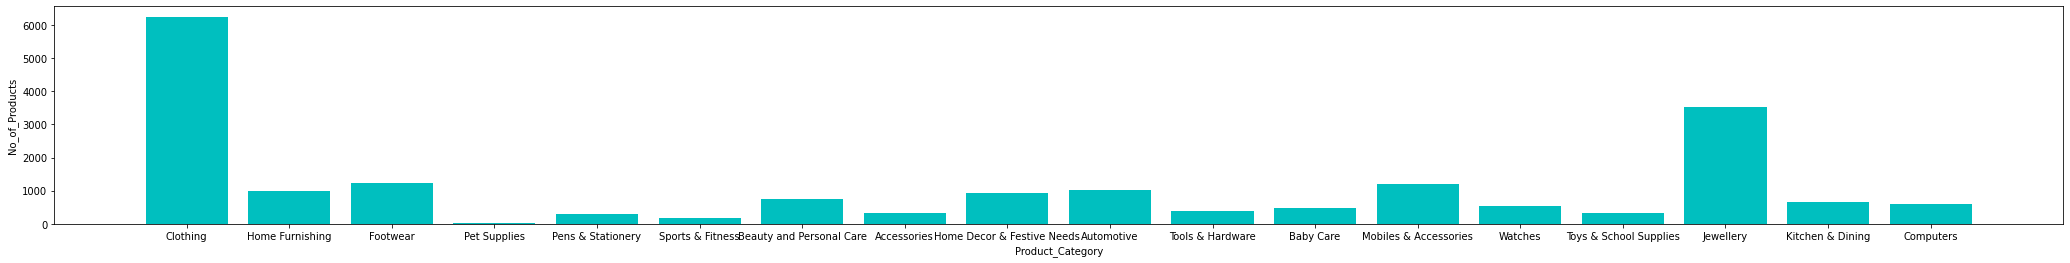

In [ ]:
keys = newcount. keys()
values = newcount. values()
fig = plt.figure(figsize = (36, 4))
plt.bar(keys, values, color ='c')
plt.xlabel('Product_Category')
plt.ylabel('No_of_Products')


1.9 Plotting a boxplot in order to figure out the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


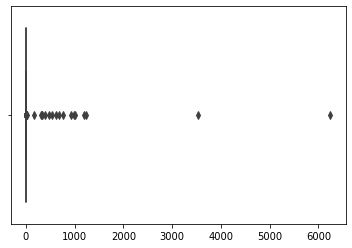

In [ ]:
#Plotting a boxplot to observe the outliers
arr = list(count.values())
arr=sorted(arr)
sns.boxplot(arr)

1.10 As we can observe from the boxplot and the bargraph that the dataset is highly unbalanced and hence, we need to balance out the dataset and pick around 1300 instances from Clothing and Jewellery

In [ ]:
for col in df['product_category_tree'].unique():
    value = len(df[df['product_category_tree']==col])
    #print(value)
    if (value<10):
      indexes = df[df['product_category_tree']==col].index 
      df.drop(indexes, inplace=True)


del count['Clothing']
del count['Jewellery']
cat_list = []
for key, value in count.items():
    if value > 5 :
       cat_list.append(key)

processed_df = df[df['product_category_tree'].isin(cat_list)]
c_list = []
c_list.append('Clothing')
clothing_df=df[df['product_category_tree'].isin(c_list)]

j_list = []
j_list.append('Jewellery')
jewellery_df=df[df['product_category_tree'].isin(j_list)]

jewellery_sub = jewellery_df.head(1300)
clothing_sub = clothing_df.head(1300)
processed_sub = processed_df.head(9941)

jewellery_sub = jewellery_sub.reset_index(drop=True)
clothing_sub = clothing_sub.reset_index(drop=True)
processed_sub = processed_sub.reset_index(drop=True)
df_balanced = pd.concat([jewellery_sub, clothing_sub, processed_sub], axis=0)
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12541 entries, 0 to 9940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  12541 non-null  object 
 1   crawl_timestamp          12541 non-null  object 
 2   product_url              12541 non-null  object 
 3   product_name             12541 non-null  object 
 4   product_category_tree    12541 non-null  object 
 5   pid                      12541 non-null  object 
 6   retail_price             12497 non-null  float64
 7   discounted_price         12497 non-null  float64
 8   image                    12538 non-null  object 
 9   is_FK_Advantage_product  12541 non-null  bool   
 10  description              12539 non-null  object 
 11  product_rating           12541 non-null  object 
 12  overall_rating           12541 non-null  object 
 13  brand                    9355 non-null   object 
 14  product_specifications 

In [ ]:
count = dict((Counter(df_balanced['product_category_tree'])))
newcount={}
for key, value in count.items():
  if value > 5 :
    newcount[key]=value
for i in newcount:
    print(i,newcount[i])

Jewellery 1300
Clothing 1300
Home Furnishing 980
Footwear 1236
Pet Supplies 30
Pens & Stationery 313
Sports & Fitness 166
Beauty and Personal Care 755
Accessories 326
Home Decor & Festive Needs 929
Automotive 1012
Tools & Hardware 391
Baby Care 461
Mobiles & Accessories 1198
Watches 530
Toys & School Supplies 330
Kitchen & Dining 671
Computers 613


1.11 Using matplotlib here, we are plotting the 'No_of_Products' against the 'Product_Category' in our dataset to check if the dataset has been balanced. 

Text(0, 0.5, 'No_of_Products')

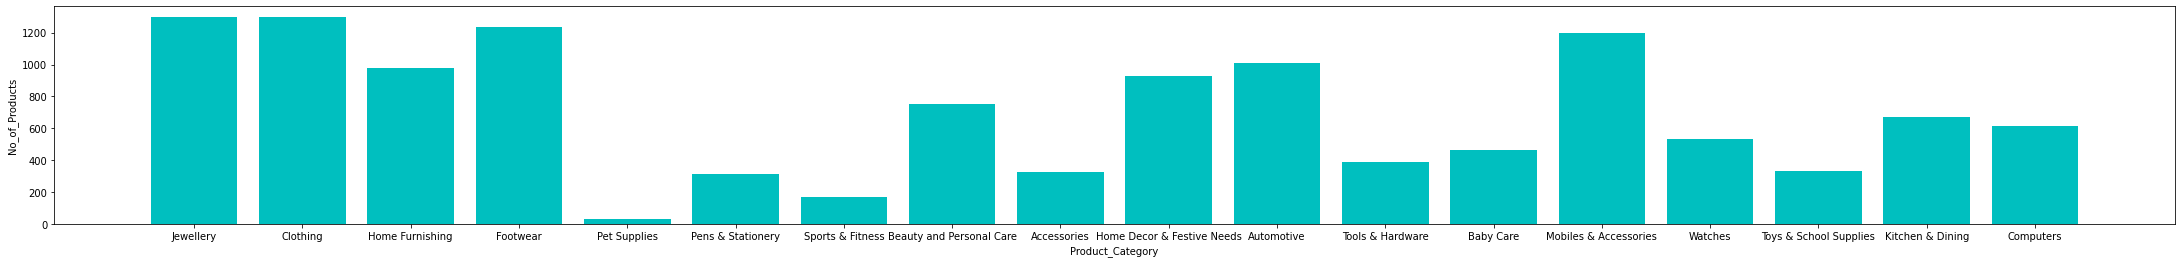

In [ ]:
keys = newcount. keys()
values = newcount. values()
fig = plt.figure(figsize = (38, 4))
plt.bar(keys, values, color ='c')
plt.xlabel('Product_Category')
plt.ylabel('No_of_Products')

1.12 We can observe that the dataset is now balanced. Plotting the boxplot in order to observe if there are still any outliers present.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(12541, 15)

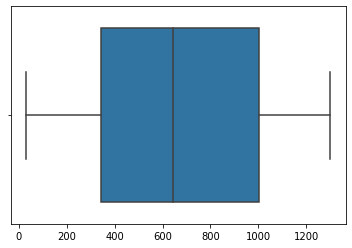

In [ ]:
arr = list(count.values())
arr=sorted(arr)
sns.boxplot(arr)
df_balanced.shape

# **Most Common Words**

1.13 Function to plot the most common words in the descriptions. This will be helpful in finding the distribution relevant words, and accordingly we can decide the preprocessing and cleaning that the description feature requires.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


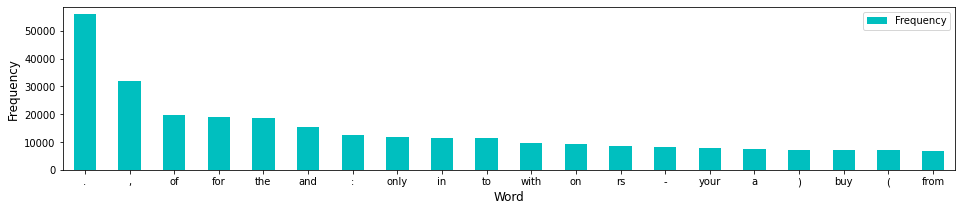

In [ ]:
import nltk
nltk.download('punkt')
def most_common_words_plt(x,c):
    words = x.str.lower().str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(words)
    words_dist = nltk.FreqDist(w for w in words)
    
    rslt = pd.DataFrame(words_dist.most_common(20),
                    columns=['Word', 'Frequency']).set_index('Word')
    rslt.plot.bar(rot=0, figsize=(16,3), color=c)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
most_common_words_plt(df_balanced.description,'c')

1.14 As we can observe that descriptions require preprocessing and cleaning. Now we define a function to remove stopwords and remove symbols or replace by space. Also we will include few more words in the liost of stopwords which have a high frequency but are irrelavant to the description, for e.g. only, your etc.

# **Preprocessing and Cleaning**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def preprocess_string(str_arg):
    stop_words = stopwords.words('english')
    stop_words.append('.')
    stop_words.append('only')
    stop_words.append("'s")
    stop_words.append('-')
    stop_words.append('buy')
    stop_words.append('flipkart.com')
    stop_words.append('online')
    stop_words.append('com')
    stop_words.append('rs')
    stop_words.append('key')
    stop_words.append('features')
    stop_words.append('fo')
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    cleaned_str=' '.join(word for word in cleaned_str.split() if word not in stop_words)
    
    return cleaned_str

df_balanced['description'] = df_balanced['description'].astype('str').apply(preprocess_string)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Most Common Words After Preprocessing**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


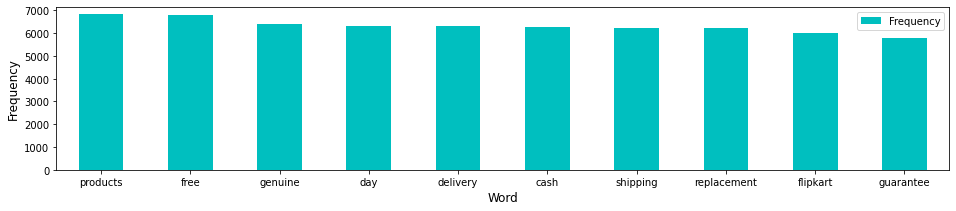

In [ ]:
import nltk
nltk.download('punkt')
def most_common_words_plt(x,c):
    words = x.str.lower().str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(words)
    words_dist = nltk.FreqDist(w for w in words)
    
    rslt = pd.DataFrame(words_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
    rslt.plot.bar(rot=0, figsize=(16,3), color=c)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
most_common_words_plt(df_balanced.description,'c')

1.15 Plotting most common words for each category in order to check if any irrelavant words are still present

In [ ]:
from collections import defaultdict
word_unique = defaultdict(list)
for i in range(0,12541):
    word_unique[df.product_category_tree.iloc[i]].extend(df_balanced.description.iloc[i].split())


In [ ]:
final = {}
for word in word_unique:
  final[word] = sorted(list(Counter(word_unique[word]).items()), key = lambda x: x[1], reverse = True)[:10]


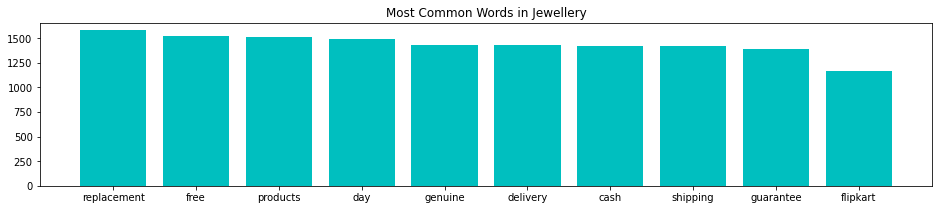

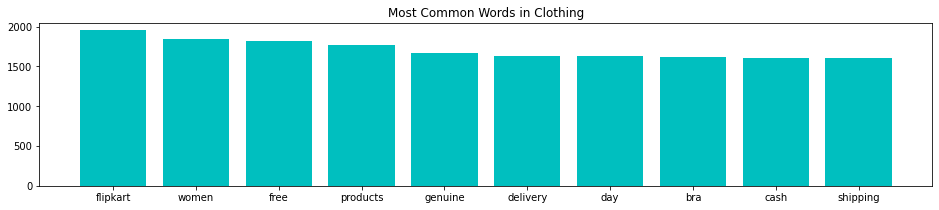

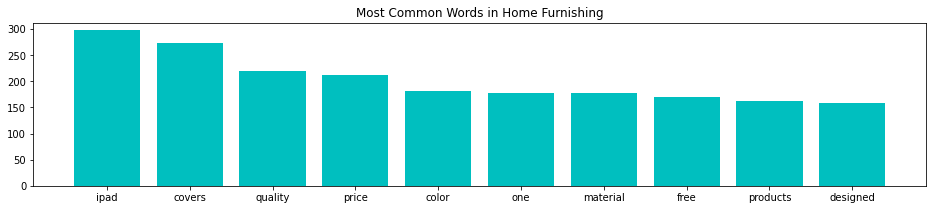

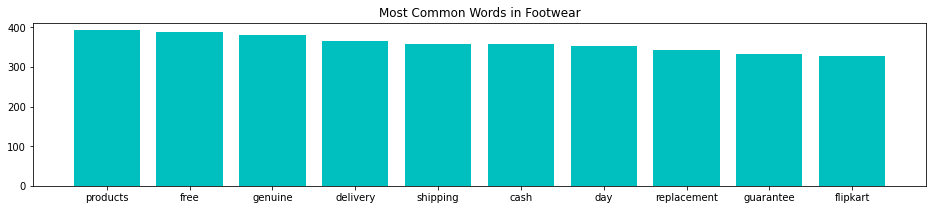

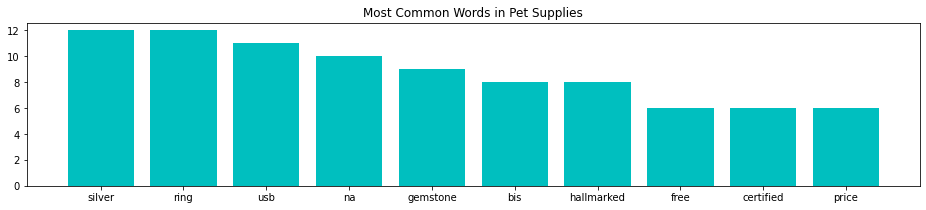

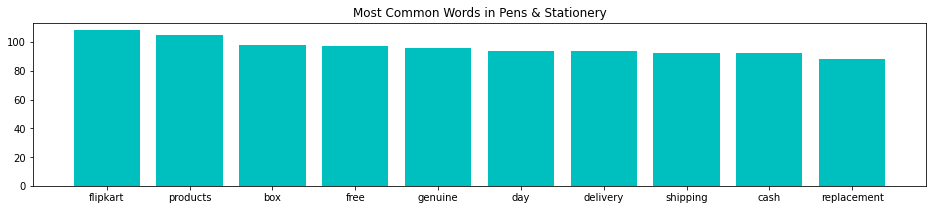

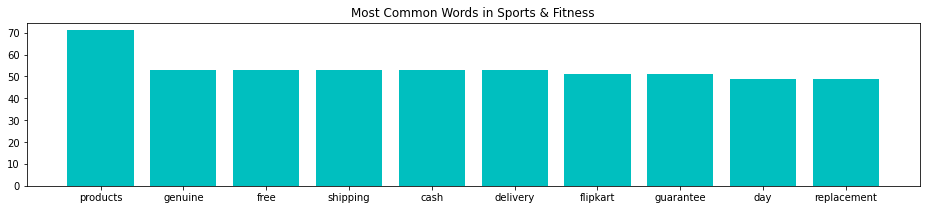

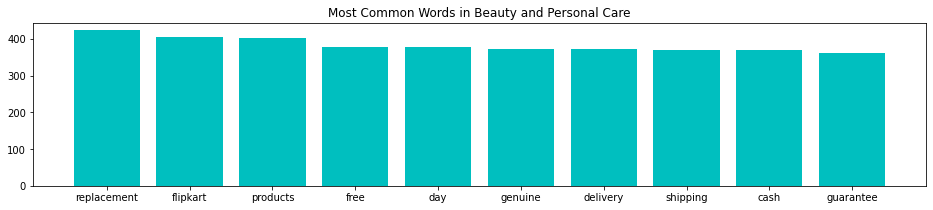

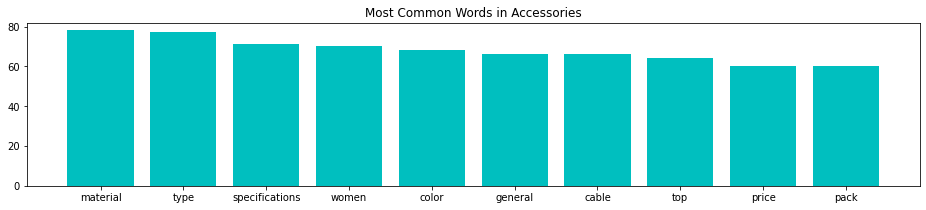

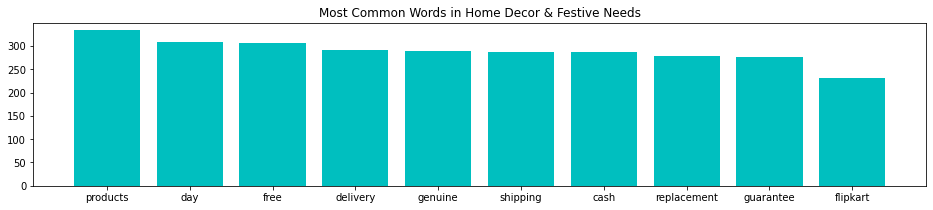

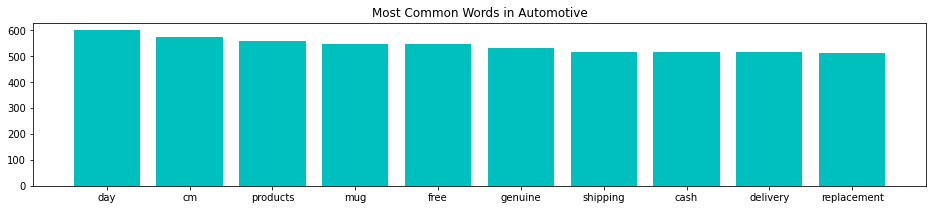

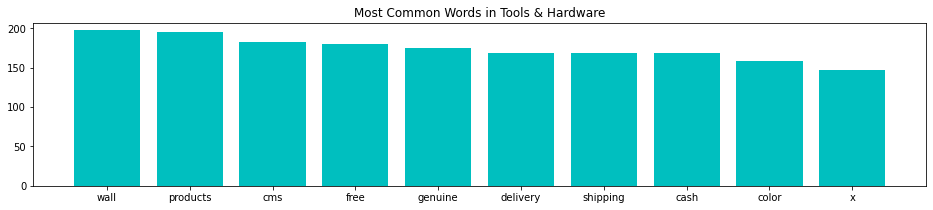

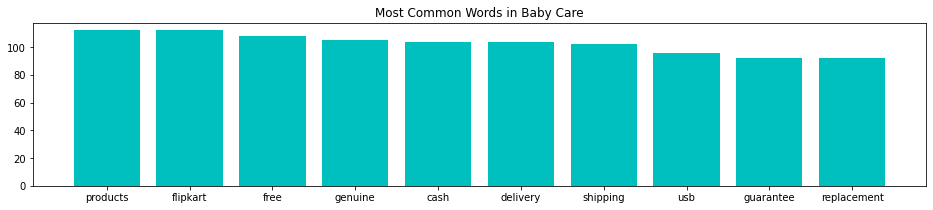

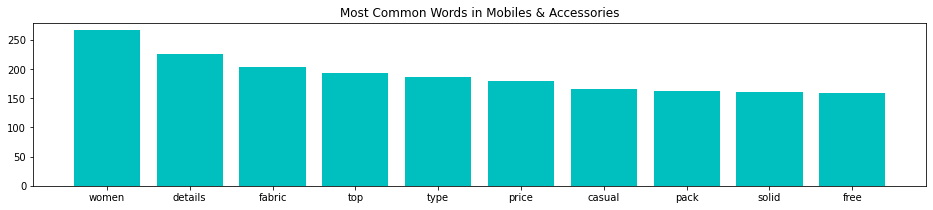

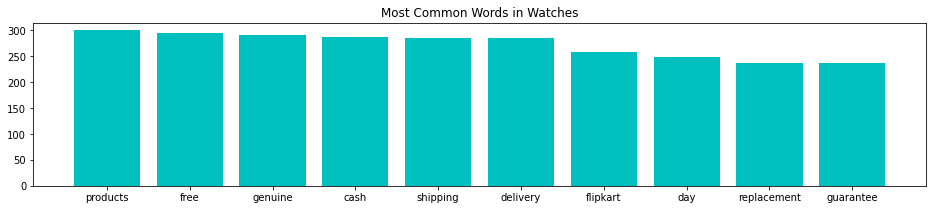

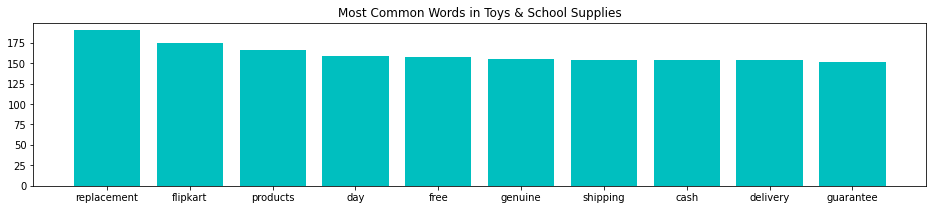

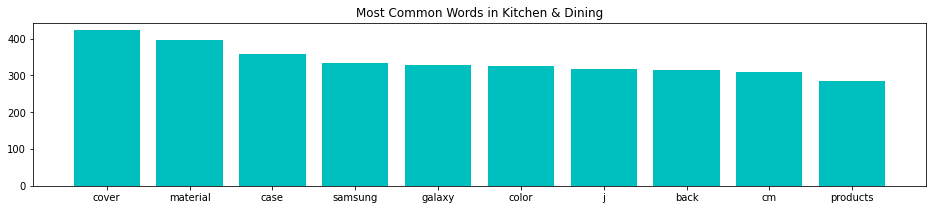

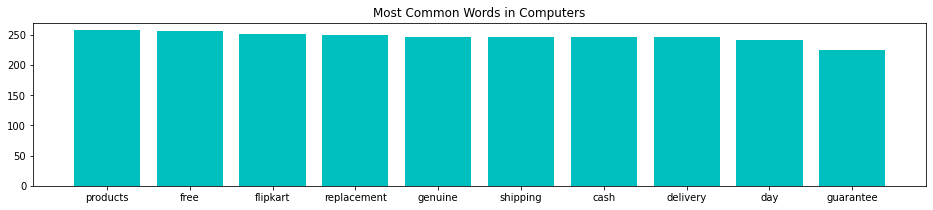

In [ ]:
#Finding Most Common word for each category
import matplotlib.pyplot as plt
for i in newcount:
    x = []
    y = []
    for j in final[i]:
        x.append(j[0])
        y.append(j[1])
    fig = plt.figure(figsize = (16, 3))
    plt.bar(x,y, color ='c')
    plt.title('Most Common Words in ' + i)

1.16 It can be observed that descriptions belonging to each of the category have relevant words only. Therefore, we do not need to further preprocess and clean the data

# **Length of Description**

ValueError: ignored

# **2.0 Model Training**

2.1 Importing necessary packages 

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(df_balanced['product_category_tree'])
df_balanced['product_category_tree'] = category_encoded

# **Logistic Regression Model**

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def lr(X,y):
    from sklearn.linear_model import LogisticRegression
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    logreg = make_pipeline(CountVectorizer(), TfidfTransformer(), LogisticRegression())
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    train_acc = logreg.score(X_train, y_train)
    valid_acc = accuracy_score(y_pred, y_test)

    print(f'\tTrain Acc: {train_acc:.3f}')
    print(f'\tVal. Acc: {valid_acc:.3f}')
    print(confusion_matrix(y_test,y_pred))
    
    print(classification_report(y_test, y_pred))

X=df_balanced['description']
y=df_balanced['product_category_tree']

lr(X,y)



	Train Acc: 0.979
	Val. Acc: 0.957
[[ 60   0   0   1   0   0   0   1   0   0   1   0   0   0   0   0   0   0]
 [  0 200   0   0   1   2   0   1   0   0   0   3   0   0   0   0   0   0]
 [  0   1  79   3   0   0   0   1   8   0   0   0   0   0   1   0   0   0]
 [  0   1   0 151   0   0   0   1   0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0 269   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0 127   0   0   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 249   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 182   0   0   2   0   0   0   0   0   0   0]
 [  0   0   2   0   0   5   0   0 201   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 242   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   5   0 123   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   2   0   0   1 233   0   0   0   0   0   0]
 [  1   0   0   1   0   0   0   1   1   0   1   0  39   0   0   0

# **Naive Bayes**

In [ ]:
def NaiveBayes(X,y):
  
    from sklearn.naive_bayes import MultinomialNB
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    nb = make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB(alpha = 0.01))
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)

    train_acc = nb.score(X_train, y_train)
    valid_acc = accuracy_score(y_pred, y_test)

    print(f'\tTrain Acc: {train_acc:.3f}')
    print(f'\tVal. Acc: {valid_acc:.3f}')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))

X=df_balanced['description']
y=df_balanced['product_category_tree']

NaiveBayes(X,y)



	Train Acc: 0.990
	Val. Acc: 0.961
[[ 55   0   0   0   0   2   2   0   0   0   0   0   2   0   0   0   2   0]
 [  0 198   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0  86   1   5   0   0   1   3   0   0   0   0   0   1   0   0   0]
 [  0   2   0 138   0   1   0   4   0   0   2   0   0   0   1   0   0   0]
 [  0   0   2   0 272   0   0   0   1   0   1   0   0   0   0   0   0   0]
 [  1   0   0   1   0 126   0   0   1   1   0   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0 264   0   0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 188   0   0   0   0   1   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 169   0   1   1   0   0   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0 257   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   2   4   0 118   0   0   0   0   0   0   0]
 [  0   2   0   2   0   5   0   0   0   0   1 240   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   2   0  46   0   1   0

# **Random Forest**

In [ ]:
def randomForest(X,y):
  
    from sklearn.ensemble import RandomForestClassifier

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = make_pipeline(CountVectorizer(),TfidfTransformer(), RandomForestClassifier(criterion = "gini", n_estimators=50, bootstrap=True, max_features='sqrt'))
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    
    train_acc = rf.score(X_train, y_train)
    valid_acc = accuracy_score(y_pred, y_test)

    print(f'\tTrain Acc: {train_acc:.3f}')
    print(f'\tVal. Acc: {valid_acc:.3f}')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))

X=df_balanced['description']
y=df_balanced['product_category_tree']

randomForest(X,y)


    

	Train Acc: 0.999
	Val. Acc: 0.952
[[ 59   0   0   1   5   2   2   0   0   0   0   0   1   0   0   0   0   0]
 [  0 217   0   0   0   3   0   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0  73   0   5   0   0   3   8   0   2   0   0   0   0   0   0   0]
 [  1   2   0 135   0   0   1   1   0   0   1   0   1   0   0   0   0   0]
 [  0   0   2   0 276   0   1   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 115   1   1   0   0   0   7   0   0   0   0   0   0]
 [  1   0   0   0   0   7 224   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 176   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   5 179   1   1   2   0   0   0   1   0   0]
 [  0   0   0   0   0   0   1   0   0 248   0   0   0   0   0   0   0   0]
 [  0   2   0   0   1   0   0   4   0   0 129   0   0   0   0   0   0   0]
 [  0   2   0   0   0   2   1   1   0   0   0 236   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   2   0   0   1   0  44   0   0   0

# **SVM Classifier**

In [ ]:
def svm(X,y):
    from sklearn.linear_model import SGDClassifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    sgd = make_pipeline(CountVectorizer(),TfidfTransformer(),SGDClassifier(alpha=0.001, penalty='elasticnet'))

    sgd.fit(X_train, y_train)

    y_pred = sgd.predict(X_test)
    
    train_acc = sgd.score(X_train, y_train)
    valid_acc = accuracy_score(y_pred, y_test)

    print(f'\tTrain Acc: {train_acc:.3f}')
    print(f'\tVal. Acc: {valid_acc:.3f}')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))

X=df_balanced['description']
y=df_balanced['product_category_tree']

svm(X,y)



	Train Acc: 0.930
	Val. Acc: 0.926
[[ 57   0   0   2   5   0   3   0   0   1   0   1   0   0   0   0   0   0]
 [  0 189   0   2   0   0   2   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0  66   1   0   0   0   2  13   0   3   0   0   0   0   0   1   0]
 [  1   2   0 144   0   0   1   0   0   0   2   1   0   0   1   0   0   0]
 [  0   0   2   1 264   0   0   0   0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 107   6   0   0   0   0   4   1   0   0   0   0   0]
 [  0   0   0   0   1   0 259   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5   3   0   0   0 175   1   0   2   0   0   0   0   0   0   0]
 [  1   0   0   1   0   2   0   5 187   1   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 251   0   0   0   0   0   0   0   0]
 [  1   1   0   1   0   2   1   5   2   0 122   1   1   0   0   0   1   0]
 [  0   2   0   0   1   3   0   0   0   1   1 220   0   0   0   0   0   0]
 [  3   0   1   3   0   1   1   2   0   4   2   1  36   0   2   0

Text(0, 0.5, 'Training_Accuracy')

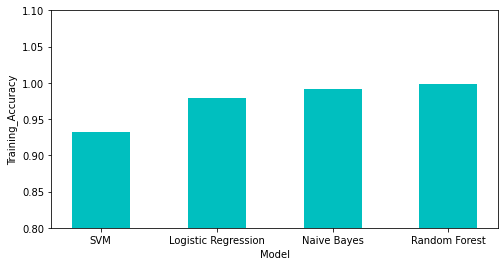

In [ ]:
Models = ['SVM', 'Logistic Regression', 'Naive Bayes','Random Forest']
Training_Accuracy = [0.932, 0.979, 0.992, 0.999]
fig = plt.figure(figsize = (8,4))
plt.bar(Models, Training_Accuracy, color ='c', width = 0.5)
plt.ylim(0.8, 1.1)
plt.xlabel('Model')
plt.ylabel('Training_Accuracy')


Text(0, 0.5, 'Val_Accuracy')

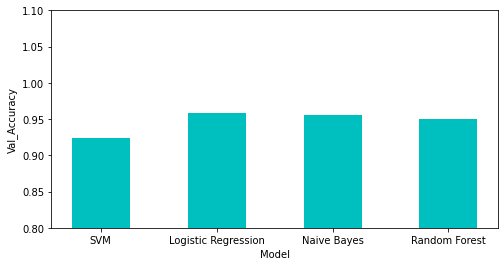

In [ ]:
Models = ['SVM', 'Logistic Regression', 'Naive Bayes','Random Forest']
Training_Accuracy = [0.924, 0.958, 0.956, 0.950]
fig = plt.figure(figsize = (8,4))
plt.bar(Models, Training_Accuracy, color ='c', width = 0.5)
plt.ylim(0.8, 1.1)
plt.xlabel('Model')
plt.ylabel('Val_Accuracy')

**The best results are seen when Random Forest Classifier is used with an accuracy of ~99%. Also, it can be observed that SVM does not perform as good as rest of the models. The perfomace of Naive Bayes and Random Forest is at par with each other**